In [13]:
import os
import glob
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def load_history(path):
    with open(path, "rb") as f:
        history = pickle.load(f)
    # history is a list[dict]; convert to DataFrame
    df = pd.DataFrame(history)
    # sort by epoch just in case
    if "epoch" in df.columns:
        df = df.sort_values("epoch")
    return df

# List available files
files = sorted(glob.glob("../jp_data/*.pkl"))
print("Found files in jp_data/:")
for i, fpath in enumerate(files):
    print(f"[{i}] {fpath}")


Found files in jp_data/:
[0] ../jp_data/mean_teacher_ensemble_1764879365.pkl


In [ ]:
# Select index manually (e.g. 0, 1, 2...)
run_idx = 0  
selected_file = files[run_idx]
print("Using file:", selected_file)

df = load_history(selected_file)

for col in df.columns:
    df[col] = df[col].apply(lambda x: float(x) if isinstance(x, (list, np.ndarray)) else x)

df.head()


Using file: ../jp_data/mean_teacher_ensemble_1764879365.pkl


,epoch,supervised_loss,unsupervised_loss,total_loss,lambda_u,val_MSE
0,1,1.956678,30.394918,4.996170,0.1,NaN
1,2,1.324255,20.393072,5.402870,0.2,NaN
2,3,1.839899,15.549939,6.504880,0.3,NaN
3,4,2.508940,12.980261,7.701044,0.4,NaN
4,5,3.227889,11.242291,8.849034,0.5,NaN


In [ ]:
import numpy as np

def col_to_1d_float_array(series):
   
    cleaned = []
    for x in series:
       
        if x is None:
            cleaned.append(np.nan)
            continue

        
        try:
            arr = np.array(x)
        except Exception:
         
            try:
                cleaned.append(float(x))
                continue
            except Exception:
                cleaned.append(np.nan)
                continue

        
        if arr.ndim == 0:
            cleaned.append(float(arr))
        else:
            # Si tiene más dimensiones, usamos la media
            cleaned.append(float(arr.mean()))
    return np.array(cleaned, dtype=float)

epochs = col_to_1d_float_array(df["epoch"]) if "epoch" in df.columns else None
sup_loss = col_to_1d_float_array(df["supervised_loss"]) if "supervised_loss" in df.columns else None
tot_loss = col_to_1d_float_array(df["total_loss"]) if "total_loss" in df.columns else None
unsup_loss = col_to_1d_float_array(df["unsupervised_loss"]) if "unsupervised_loss" in df.columns else None
val_mse = col_to_1d_float_array(df["val_MSE"]) if "val_MSE" in df.columns else None

print("epochs:", epochs.shape, epochs[:5])
print("supervised_loss:", sup_loss.shape if sup_loss is not None else None)


epochs: (250,) [1. 2. 3. 4. 5.]
supervised_loss: (250,)


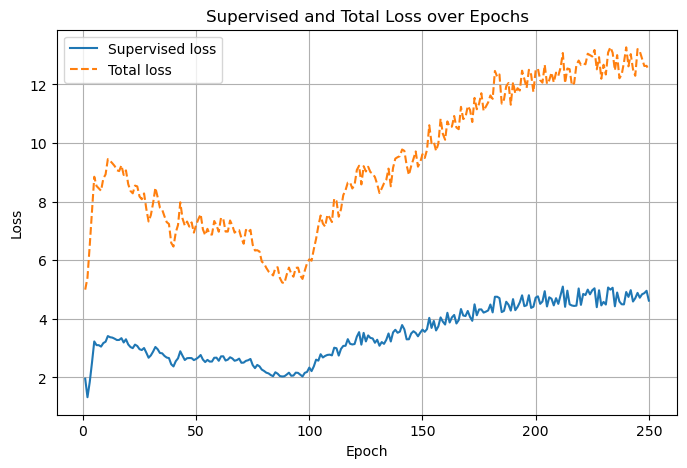

In [22]:
plt.figure(figsize=(8, 5))
if sup_loss is not None and epochs is not None:
    plt.plot(epochs, sup_loss, label="Supervised loss")
if tot_loss is not None and epochs is not None:
    plt.plot(epochs, tot_loss, label="Total loss", linestyle="--")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Supervised and Total Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()


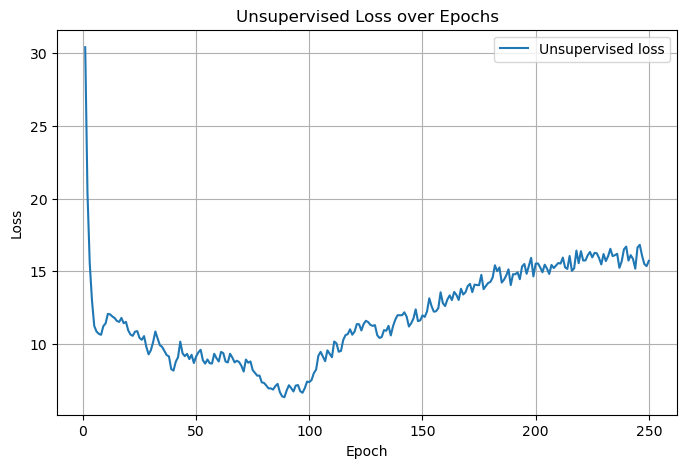

In [23]:
if unsup_loss is not None and epochs is not None:
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, unsup_loss, label="Unsupervised loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Unsupervised Loss over Epochs")
    plt.legend()
    plt.grid(True)
    plt.show()


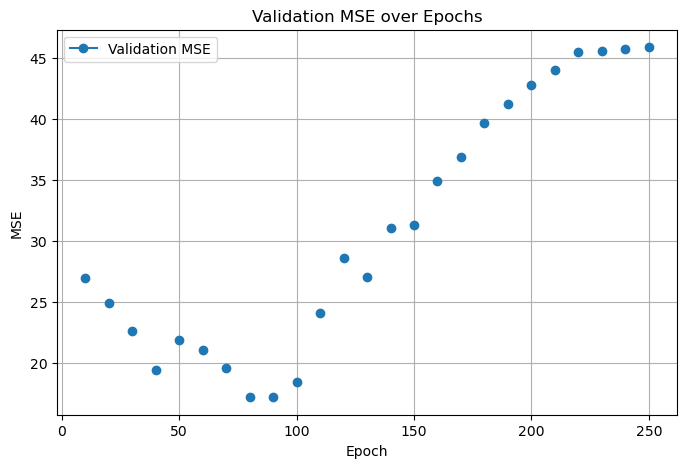

In [24]:
if val_mse is not None and epochs is not None:
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, val_mse, marker="o", label="Validation MSE")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.title("Validation MSE over Epochs")
    plt.legend()
    plt.grid(True)
    plt.show()

